In [91]:
#importing essential libraries
import pandas as pd 
import os

In [93]:
pwd

'/Users/prathamkumar'

In [95]:
#Reading any one month data
df = pd.read_csv('/users/prathamkumar/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Merging all the twelve months data

In [98]:
#creating an empty dataframe
all_months_data = pd.DataFrame()

files = [file for file in os.listdir('/Users/prathamkumar') if file.endswith('.csv')]  #lsiting files in the directory

for file in files:
    file_path = os.path.join('/Users/prathamkumar', file)  #joining file paths
    df = pd.read_csv(file_path)  # Read the current file
    all_months_data = pd.concat([all_months_data, df], ignore_index=True)   #Merging data


all_months_data.to_csv("all_data.csv", index=False)  #Saving the merged data

In [99]:
os.getcwd()

'/Users/prathamkumar'

### Read in updated dataframe

In [102]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean up the data

In [106]:
#Checking and removing NaNs
nan_df = all_data[all_data.isnull().any(axis=1)]

all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### loading the dataset, cleaning column names

In [108]:
all_data = pd.read_csv("all_data.csv")

# Convert 'all_data' to DataFrame if it's a Series
if isinstance(all_data, pd.Series):
    all_data = all_data.to_frame()

# Strip extra spaces from column names
all_data.columns = all_data.columns.str.strip()

# Check if 'Order Date' exists
if 'Order Date' not in all_data.columns:
    print("Error: 'Order Date' column not found!")
else:
    # Drop rows where 'Order Date' contains column headers
    all_data = all_data[all_data['Order Date'].astype(str).str[:2] != 'Or']

    # Check the data
    print(all_data.head())

  Order ID               Product Quantity Ordered Price Each      Order Date  \
0   295665    Macbook Pro Laptop                1       1700  12/30/19 00:01   
1   295666    LG Washing Machine                1      600.0  12/29/19 07:03   
2   295667  USB-C Charging Cable                1      11.95  12/12/19 18:21   
3   295668      27in FHD Monitor                1     149.99  12/22/19 15:13   
4   295669  USB-C Charging Cable                1      11.95  12/18/19 12:38   

                         Purchase Address  
0  136 Church St, New York City, NY 10001  
1     562 2nd St, New York City, NY 10001  
2    277 Main St, New York City, NY 10001  
3     410 6th St, San Francisco, CA 94016  
4           43 Hill St, Atlanta, GA 30301  


### convert columns to the correct type

In [110]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional column

### 1.add month column

In [114]:
# Extract month from 'Order Date'
all_data['Month'] = all_data['Order Date'].str[0:2]

# Option 1: Fill NaN values with 0 (or any placeholder you prefer)
all_data['Month'] = all_data['Month'].fillna(0)

# Option 2: Alternatively, drop rows where 'Month' is NaN
# all_data = all_data[all_data['Month'].notna()]

# Convert 'Month' to int32
all_data['Month'] = all_data['Month'].astype('int32')

# Display result
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### 2.add sales column

In [117]:
all_data['Sales']=all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### 3.add city column

In [120]:
def get_city(address):
    try:
        return address.split(',')[1].strip()  # Extract city and remove spaces
    except:
        return "Unknown"  # Handle errors

def get_state(address):
    try:
        return address.split(',')[2].split(' ')[1].strip()  # Extract state code
    except:
        return "Unknown"  # Handle errors

# Ensure 'Purchase Address' has no NaN values
all_data = all_data.dropna(subset=['Purchase Address']).copy()  # Create a copy to avoid SettingWithCopyWarning

# Apply the functions safely
all_data.loc[:, 'City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ', ' + get_state(x))

# Display first few rows
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA"


### what was the best month for sales? how much was earned in that month.

In [125]:
Results = all_data.groupby('Month').sum(numeric_only = True)
Results.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,119933.0,19929452.18,20044824.03
2,147939.0,24077731.92,24222246.62
3,187055.0,30703286.13,30878104.18
4,472606.0,77394424.30,77923370.48
5,205685.0,34613041.83,34805385.73


Available columns: Index(['Quantity Ordered', 'Price Each', 'Sales'], dtype='object')


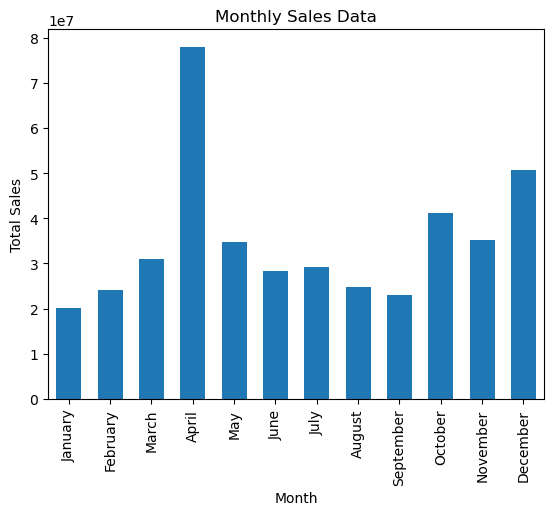

In [127]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure inline plotting in Jupyter Notebook
%matplotlib inline
plt.ion()  # Interactive mode ON to force display

# Define month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Check if 'Sales' exists
print("Available columns:", Results.columns)

# Filter and clean the Results DataFrame
if 'Sales' in Results.columns:
    #cleaning the data first
    Results['Sales'] = pd.to_numeric(Results['Sales'], errors='coerce')  # Convert non-numeric values
    Results = Results.dropna(subset=['Sales'])  # Drop NaN rows
    Results = Results[(Results.index >= 1) & (Results.index <= 12)]  # Keep only months 1-12
    
    # Define x-axis values (months)
    Months = Results.index

    # Plot the data with adjusted bar width
    plt.bar(Months, Results['Sales'], width=0.6)  # Adjust width (default is 0.8)

    # Add x-axis labels as month names
    plt.xticks(Months, month_names[:len(Months)], rotation=90)  # Rotate labels for better readability

    # Adjust x-axis limits to give more space
    plt.xlim(Months.min() - 0.5, Months.max() + 0.5)

    # Add labels and title
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.title('Monthly Sales Data')
    plt.savefig('Monthly_sales_data.png',format = 'png')
    # Show the plot
    plt.show()

else:
    print("Error: 'Sales' column not found in Results!")




#### What city has the highest number of sales?

In [130]:
results = all_data.groupby('City').sum(numeric_only = True)
results.head(10)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta, GA",202218.0,3.397355e+07,1223402,3.416394e+07
"Austin, TX",135787.0,2.196646e+07,814823,2.208760e+07
"Boston, MA",274088.0,4.423242e+07,1644368,4.452462e+07
"Dallas, TX",202258.0,3.329917e+07,1215644,3.348182e+07
"Los Angeles, CA",406967.0,6.621168e+07,2436859,6.659507e+07
"New York City, NY",340144.0,5.629779e+07,2049995,5.666655e+07
"Portland, ME",33430.0,5.427525e+06,200248,5.457779e+06
"Portland, OR",137941.0,2.283881e+07,824567,2.296116e+07
"San Francisco, CA",612473.0,1.000501e+08,3683840,1.006891e+08


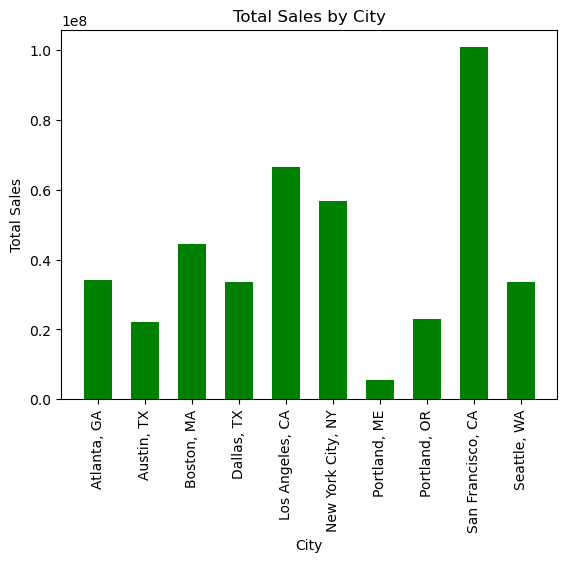

In [134]:
import matplotlib.pyplot as plt

# Ensure inline plotting in Jupyter Notebook
%matplotlib inline

# Group data by 'City' and sum the 'Sales' values
results = all_data.groupby('City')['Sales'].sum(numeric_only = True)

# Plot the data
plt.bar(results.index, results,width = 0.6,color = 'g')  # Create bar chart (x: City, y: Sales)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total Sales by City')
plt.xticks(rotation=90)  # Rotate x-axis labels to avoid overlap if many cities
plt.savefig('Total_sales_by_city.png',format = 'png')
plt.show()




### what time should we display advertisements to maximize likelihood of cutomers buying product.

In [173]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12


In [175]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%Y %H:%M', errors='coerce')
all_data = all_data.dropna(subset=['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12


In [177]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12


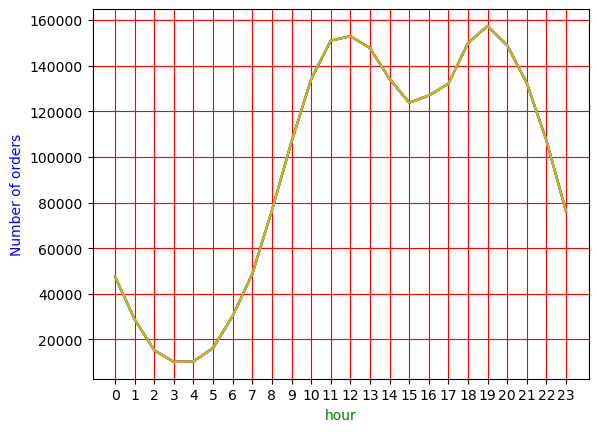

In [179]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby('Hour').count())
plt.xlabel('hour', color = 'g')
plt.ylabel('Number of orders', color = 'b')
plt.xticks(hours)    
plt.grid(color = 'r')    
plt.show()

#recommended time to display advertisement are 11AM (11) or 7PM  (19)

### what products are often sold together?

In [182]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df.head(30)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12
5,295670,AA Batteries (4-pack),1.0,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,"New York City, NY",22
6,295671,USB-C Charging Cable,1.0,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,"Portland, OR",15
7,295672,USB-C Charging Cable,2.0,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,"Dallas, TX",9
8,295673,Bose SoundSport Headphones,1.0,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,"Dallas, TX",23
9,295674,AAA Batteries (4-pack),4.0,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,"Dallas, TX",11


In [184]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head(10)

,Order ID,Grouped
0,295665,"Macbook Pro Laptop,Macbook Pro Laptop,Macbook ..."
1,295666,"LG Washing Machine,LG Washing Machine,LG Washi..."
2,295667,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
3,295668,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
4,295669,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
5,295670,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
6,295671,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
7,295672,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
8,295673,"Bose SoundSport Headphones,Bose SoundSport Hea..."
9,295674,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."


In [185]:
#importing some more librearies 
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)

('Lightning Charging Cable', 'Lightning Charging Cable') 1635970
('USB-C Charging Cable', 'USB-C Charging Cable') 1623747
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 1545668
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 1536517
('Wired Headphones', 'Wired Headphones') 1417373
('Apple Airpods Headphones', 'Apple Airpods Headphones') 1158885
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 990398
('27in FHD Monitor', '27in FHD Monitor') 559306
('iPhone', 'iPhone') 513766
('34in Ultrawide Monitor', '34in Ultrawide Monitor') 469910


### what product sold the most? why do you think it sold the most

In [161]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12


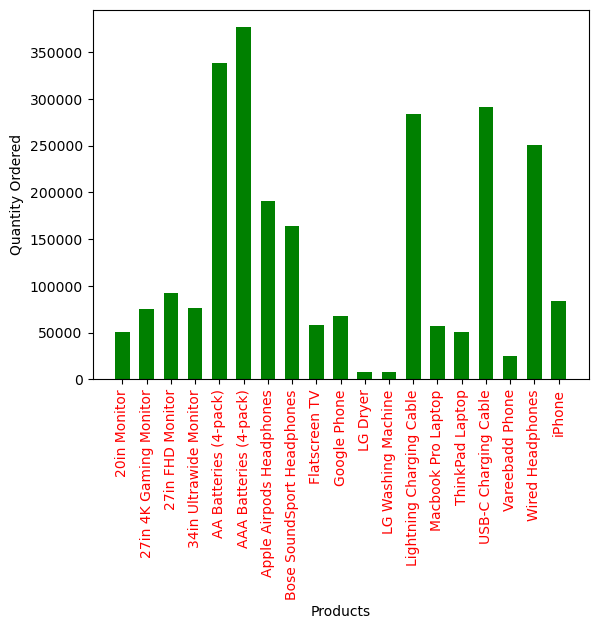

In [165]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum(numeric_only = True)['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered,width = 0.6, color = 'g')
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation = 90, color = 'r')
plt.show()


#AAA batteries are the most sold product!!

In [167]:
Prices = all_data.groupby('Product').mean(numeric_only = True)['Price Each']
print(Prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


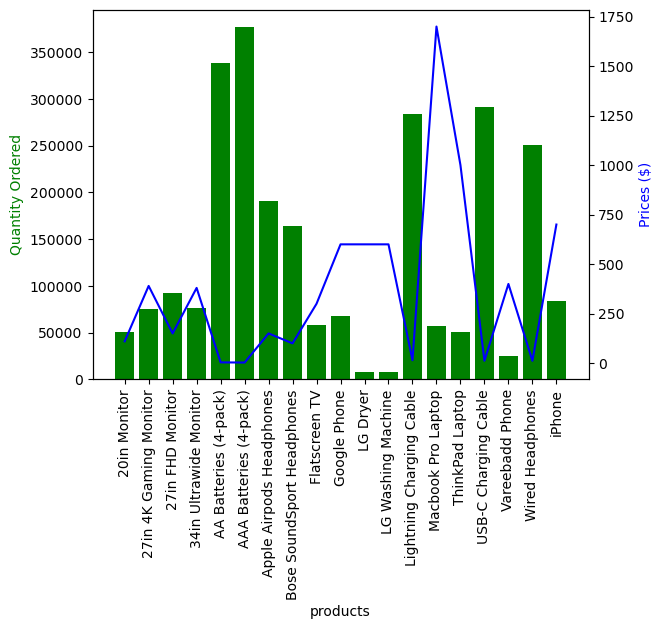

In [169]:
#overlaying this above data to our plot adding secondary y-axis
Prices = all_data.groupby('Product').mean(numeric_only = True)['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, Prices, 'b-')
ax1.set_xlabel('products')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Prices ($)', color = 'b')
ax1.set_xticks(range(len(products)))  # Set tick positions
ax1.set_xticklabels(products, rotation = 90)

plt.show()